<a href="https://colab.research.google.com/github/siggu/Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7_%EA%B3%A0%EA%B8%89_%EB%84%98%ED%8C%8C%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.1 고급 넘파이
넘파이 어레이를 조작하는 고급 기능 일부를 예제를 이용하여 살펴본다.

In [1]:
# 넘파이
import numpy as np
# 램덤 시드
np.random.seed(12345)
# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt
# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

# 7.1 어레이 조작 고급 기법

## 7.1.1. 어레이 모양 변형

`reshape()` 메서드

`reshape()` 메서드를 활용하여 지정된 튜플의 모양으로 주어진 어레이의 모양을 변형한다. 단, 항목의 수가 변하지 않도록 모양을 지정해야 한다.

예를 들어, 길이가 8인 1차원 어레이가 다음과 같다.

In [4]:
arr = np.arange(8)

arr

array([0, 1, 2, 3, 4, 5, 6, 7])

이제 (4, 2) 모양의 2차원 어레이로 모양을 변형할 수 있다.

In [5]:
arr.reshape((4,2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

항목의 수만 같으면 임의의 차원의 어레이를 임의의 차원의 어레이로 변형시킬 수 있다.

In [7]:
arr.reshape((4,2)).reshape((2,2,2))

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

`-1`의 역할

어레이의 모양을 지정할 때 튜플의 특정 위치에 -1을 사용할 수 있다. 그러면 그 위치의 값은 튜플의 다른 항목의 정보를 이용하여 자동으로 지정된다. 예를 들어, 아래 코드에서 -1은 4를 의미한다. 이유는 20개의 항목을 5개의 행으로 이루어진 2차원 어레이로 지정하려면 열은 4개가 있어야 하기 때문이다.

In [10]:
arr = np.arange(20)
arr.reshape(5,-1)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [14]:
arr.reshape((5,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

동일한 이유로 아래에서 -1은 5를 의미한다.

In [15]:
arr.reshape((2,-1,2))

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9]],

       [[10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]]])

In [16]:
arr.reshape((2,5,2))

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9]],

       [[10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]]])

## 7.1.2. 차원 추가
어레이에 임의의 축을 추가하는 방식으로 1차원 커진 어레이를 생성할 수 있다. 어느 축을 지정하느냐에 따라 다른 모양을 갖게 된다.

**예제**

다음 길이가 3인 1차원 어레이를 이용하자.

- `np.random.normal()` 함수는 `np.random.randn()` 함수를 일반화하여 정규분포를 따르면서 무작위 수를 생성한다. 평균값은 표준편차를 지정할 수 있으며, 기본값은 평균값 : 0, 표준편차 : 1로 표준 정규분포를 따로도록 한다.

In [17]:
arr_1d = np.random.normal(size=3)
arr_1d

array([-0.2047,  0.4789, -0.5194])

아래 코드는 열 관련 축을 추가한다.

In [18]:
arr_1d[:, np.newaxis]

array([[-0.2047],
       [ 0.4789],
       [-0.5194]])

`reshape()` 메서드로도 동일한 결과를 얻을 수 있다.

In [21]:
arr_1d.reshape((3,1))

array([[-0.2047],
       [ 0.4789],
       [-0.5194]])

아래 코드는 행 관련 축을 추가한다.

In [22]:
arr_1d[np.newaxis, :]

array([[-0.2047,  0.4789, -0.5194]])

In [23]:
arr_1d.reshape((1,3))

array([[-0.2047,  0.4789, -0.5194]])

**예제**

2차원 어레이에 축을 추가함녀 3차원 어레이가 생성되며, 작동방식은 앞서와 동일하다.

In [26]:
arr = np.random.randn(4,3)
arr

array([[ 0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397],
       [ 0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026]])

In [27]:
arr[:,:,np.newaxis].shape

(4, 3, 1)

In [29]:
arr[:,np.newaxis,:].shape

(4, 1, 3)

In [30]:
arr[:,np.newaxis,:]

array([[[ 0.8864, -2.0016, -0.3718]],

       [[ 1.669 , -0.4386, -0.5397]],

       [[ 0.477 ,  3.2489, -1.0212]],

       [[-0.5771,  0.1241,  0.3026]]])

`ravel()` 메서드와 `flatten()` 메서드

두 메서드 모두 1차원 어레이를 반환한다. 즉, 차원을 모두 없앤다.

In [31]:
arr = np.arange(15).reshape((5,3))
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [32]:
arr1 = arr.ravel()
arr1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [33]:
arr2 = arr.flatten()
arr2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

차이점은 `ravel()` 메서드는 뷰(view)를 사용하는 반면 `flatten()` 메서드는 어레이를 새로 생성한다. 예를 들어, 아래처럼 `arr1`의 항목을 변경하면 `arr`의 항목도 함께 변경된다.

In [34]:
arr1[0] = -1
arr

array([[-1,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

`arr2`는 `arr`과 전혀 상관이 없다.

In [35]:
arr2[0] = -7
arr2

array([-7,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 7.1.3. 어레이 쪼개기/쌓기

`np.split()` 함수

어레이를 지정된 기준에 따라 여러 개의 어레이로 쪼갠다. 반환값은 쪼개진 어레이들의 리스트이다.

아래 예제를 살펴보자

In [39]:
arr = np.random.randn(7,5)
arr

array([[ 0.05  ,  0.6702,  0.853 , -0.9559, -0.0235],
       [-2.3042, -0.6525, -1.2183, -1.3326,  1.0746],
       [ 0.7236,  0.69  ,  1.0015, -0.5031, -0.6223],
       [-0.9212, -0.7262,  0.2229,  0.0513, -1.1577],
       [ 0.8167,  0.4336,  1.0107,  1.8249, -0.9975],
       [ 0.8506, -0.1316,  0.9124,  0.1882,  2.1695],
       [-0.1149,  2.0037,  0.0296,  0.7953,  0.1181]])

`np.split()` 함수의 인자는 정수이거나 정수들의 리스트가 사용된다. 먼저, 정수 리스트가 들어오면 축이 정한 방향으로 리스트에 포함된 정수를 이용하여 여러 개의 구간으로 쪼갠다.

아래 코드는 행을 기준으로 행의 인덱스를 0-1, 2, 3-4, 5-7  네 개의 구간으로 쪼갠다. 따라서 결과는 네 개의 어레이로 이루어진 리스트가 되며, 각 어레이 모양은 다음과 같다.

`(2, 5), (1, 5), (2, 5), (2, 5)`

In [40]:
np.split(arr, [2, 3, 5], axis=0)

[array([[ 0.05  ,  0.6702,  0.853 , -0.9559, -0.0235],
        [-2.3042, -0.6525, -1.2183, -1.3326,  1.0746]]),
 array([[ 0.7236,  0.69  ,  1.0015, -0.5031, -0.6223]]),
 array([[-0.9212, -0.7262,  0.2229,  0.0513, -1.1577],
        [ 0.8167,  0.4336,  1.0107,  1.8249, -0.9975]]),
 array([[ 0.8506, -0.1316,  0.9124,  0.1882,  2.1695],
        [-0.1149,  2.0037,  0.0296,  0.7953,  0.1181]])]

반면에 열을 기준으로 0, 1-2, 3-4, 3개의 구간으로 쪼개면 다음과 같으며, 각 어레이의 모양은 다음과 같다.

`(7, 1), (7, 2), (7, 2)`

In [41]:
np.split(arr, [1, 3], axis=1)

[array([[ 0.05  ],
        [-2.3042],
        [ 0.7236],
        [-0.9212],
        [ 0.8167],
        [ 0.8506],
        [-0.1149]]), array([[ 0.6702,  0.853 ],
        [-0.6525, -1.2183],
        [ 0.69  ,  1.0015],
        [-0.7262,  0.2229],
        [ 0.4336,  1.0107],
        [-0.1316,  0.9124],
        [ 2.0037,  0.0296]]), array([[-0.9559, -0.0235],
        [-1.3326,  1.0746],
        [-0.5031, -0.6223],
        [ 0.0513, -1.1577],
        [ 1.8249, -0.9975],
        [ 0.1882,  2.1695],
        [ 0.7953,  0.1181]])]

`np.vsplit()`/`np.hsplit()` 함수

두 함수 `np.split()` 함수에 축을 각각 0과 1로 지정한 함수이다.

- `np.vsplit(arr, z)` = `np.split(arr, z, axis=0)`

In [42]:
np.vsplit(arr, [2, 3, 5])

[array([[ 0.05  ,  0.6702,  0.853 , -0.9559, -0.0235],
        [-2.3042, -0.6525, -1.2183, -1.3326,  1.0746]]),
 array([[ 0.7236,  0.69  ,  1.0015, -0.5031, -0.6223]]),
 array([[-0.9212, -0.7262,  0.2229,  0.0513, -1.1577],
        [ 0.8167,  0.4336,  1.0107,  1.8249, -0.9975]]),
 array([[ 0.8506, -0.1316,  0.9124,  0.1882,  2.1695],
        [-0.1149,  2.0037,  0.0296,  0.7953,  0.1181]])]

- `np.hsplit(arr, z)` = `np.split(arr, z, axis=1)`

In [43]:
np.hsplit(arr, [1, 3])

[array([[ 0.05  ],
        [-2.3042],
        [ 0.7236],
        [-0.9212],
        [ 0.8167],
        [ 0.8506],
        [-0.1149]]), array([[ 0.6702,  0.853 ],
        [-0.6525, -1.2183],
        [ 0.69  ,  1.0015],
        [-0.7262,  0.2229],
        [ 0.4336,  1.0107],
        [-0.1316,  0.9124],
        [ 2.0037,  0.0296]]), array([[-0.9559, -0.0235],
        [-1.3326,  1.0746],
        [-0.5031, -0.6223],
        [ 0.0513, -1.1577],
        [ 1.8249, -0.9975],
        [ 0.1882,  2.1695],
        [ 0.7953,  0.1181]])]

`np.concatenate()` 함수

두 개의 어레이를 이어 붙인다. 지정되는 축에 따라 좌우로 또는 상하로 이어붙인다.

아래 두 어레이가 주어졌다고 가정해보자.

In [44]:
arr1 = np.array([[1,2,3],[4,5,6]])
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
arr2 = np.array([[7,8,9],[10,11,12]])
arr2

array([[ 7,  8,  9],
       [10, 11, 12]])

위 아래루 이어붙이려면 축을 0으로 지정한다.

**주의사항** : 인자의 길이가 2인 리스트이다.

In [46]:
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

좌우로 이어붙이려면 축을 1로 정한다.

In [47]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

`np.vstack()`/`np.hstack()` 함수

두 함수 `np.concatenate()` 함수에 축을 각각 0과 1로 지정한 함수이다.

**주의사항** : 인자의 길이가 2인 튜플이다.

- `np.vstack((x, y))` = `np.concatenate([x, y], axis=0)`

In [49]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

- `np.hstack((x, y))` = `np.concatenate([x, y], axis=1)`

In [51]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

`np.r_[]`/`np.c_[]` 객체

`vstack()`/`hstack()`  과 동일한 기능을 수행하는 특수한 객체들이다.

아래 세 개의 어레이를 이용하여 사용법을 살펴본다.

In [52]:
arr = np.arange(6)
arr

array([0, 1, 2, 3, 4, 5])

In [53]:
arr1 = np.arange(6).reshape((3,2))
arr1

array([[0, 1],
       [2, 3],
       [4, 5]])

In [54]:
arr2 = np.random.randn(3,2)

아래 코드는 `np.vstack((arr1, arr2))`와 동일하다.

In [56]:
np.r_[arr1,arr2]

array([[ 0.    ,  1.    ],
       [ 2.    ,  3.    ],
       [ 4.    ,  5.    ],
       [-0.7485,  0.585 ],
       [ 0.1527, -1.5657],
       [-0.5625, -0.0327]])

In [59]:
np.vstack([arr1, arr2])

array([[ 0.    ,  1.    ],
       [ 2.    ,  3.    ],
       [ 4.    ,  5.    ],
       [-0.7485,  0.585 ],
       [ 0.1527, -1.5657],
       [-0.5625, -0.0327]])

아래 코드는 `np.vstack((arr1, arr2))`와 동일하다.

In [60]:
np.r_[arr1, arr2]

array([[ 0.    ,  1.    ],
       [ 2.    ,  3.    ],
       [ 4.    ,  5.    ],
       [-0.7485,  0.585 ],
       [ 0.1527, -1.5657],
       [-0.5625, -0.0327]])

In [61]:
np.vstack((arr1, arr2))

array([[ 0.    ,  1.    ],
       [ 2.    ,  3.    ],
       [ 4.    ,  5.    ],
       [-0.7485,  0.585 ],
       [ 0.1527, -1.5657],
       [-0.5625, -0.0327]])

행 또는 열의 크기를 적절하게 맞출 수 있는 어떤 조합도 가능하다.

In [62]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.    ,  1.    ,  0.    ],
       [ 2.    ,  3.    ,  1.    ],
       [ 4.    ,  5.    ,  2.    ],
       [-0.7485,  0.585 ,  3.    ],
       [ 0.1527, -1.5657,  4.    ],
       [-0.5625, -0.0327,  5.    ]])

# 7.2 브로드캐스팅

모양이 서로 다른 두 어레이의 연산이 가능한 경우 브로드캐스팅이 가능하다. 예를 들어, 하나의 어레이와 하나의 정수의 곱셈이 항목별로 작동한다.

In [65]:
arr = np.arange(6).reshape(2,3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

이유는 `arr * 4` 가 아래 어레이의 곱셈과 동일하게 작동하기 때문이다. 즉, 정수 4로 채워진 동일한 모양의 어레이를 먼저 생성한 후에 항목별로 곱셈을 진행한다.

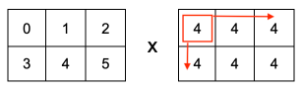

In [66]:
arr * 4

array([[ 0,  4,  8],
       [12, 16, 20]])

**예제**

아래 코드는 1차원 어레이를 2차원 어레이로 확장하여 다른 어레이와 모양을 맞춘 후 연산을 실행하는 것을 보여준다.

In [80]:
arr2 = np.arange(4).reshape((4,1)).repeat(3, axis=1)
arr2

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [81]:
arr3 = np.arange(1,4)
arr3

array([1, 2, 3])

In [82]:
arr2 + arr3

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

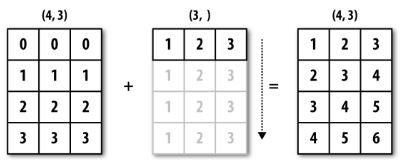

In [83]:
arr3a = np.arange(1,4).reshape(1,3)
arr3a

array([[1, 2, 3]])

In [84]:
arr2 + arr3a

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

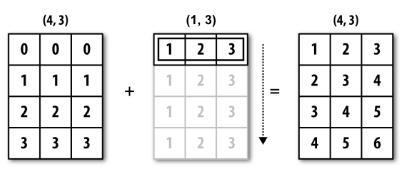

**예제**

아래 예제는 2차원 어레이의 칸을 복제하여 모양을 맞춘 후 연산을 실행한다.

In [85]:
arr4 = np.arange(1,5).reshape((4,1))
arr4

array([[1],
       [2],
       [3],
       [4]])

In [86]:
arr2 + arr4

array([[1, 1, 1],
       [3, 3, 3],
       [5, 5, 5],
       [7, 7, 7]])

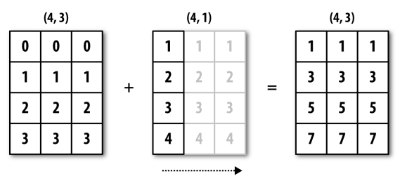

**예제**

아래 예제는 2차원 어레이를 3차원으로 확장한 후에 연산을 진행하는 것을 보여준다.

In [87]:
arr6 = np.arange(24).reshape((3, 4, 2))
arr6

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [88]:
arr7 = np.arange(8).reshape((4,2))
arr7

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [89]:
arr6 + arr7

array([[[ 0,  2],
        [ 4,  6],
        [ 8, 10],
        [12, 14]],

       [[ 8, 10],
        [12, 14],
        [16, 18],
        [20, 22]],

       [[16, 18],
        [20, 22],
        [24, 26],
        [28, 30]]])

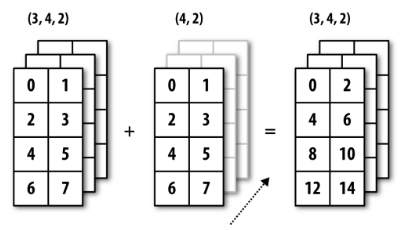

**예제**

In [100]:
arr = np.random.randn(4, 3)
arr

array([[-0.4028,  0.2205, -0.1934],
       [ 0.6692, -1.649 , -2.2528],
       [-1.1668,  0.3536,  0.7021],
       [-0.2746, -0.1391,  0.1077]])

In [101]:
arr.mean(0)

array([-0.2938, -0.3035, -0.4091])

In [102]:
demeaned = arr - arr.mean(0)
demeaned

array([[-0.1091,  0.524 ,  0.2157],
       [ 0.9629, -1.3455, -1.8437],
       [-0.8731,  0.6571,  1.1112],
       [ 0.0192,  0.1644,  0.5168]])

In [103]:
demeaned.mean(0)

array([ 0., -0., -0.])

**예제**

In [104]:
arr

array([[-0.4028,  0.2205, -0.1934],
       [ 0.6692, -1.649 , -2.2528],
       [-1.1668,  0.3536,  0.7021],
       [-0.2746, -0.1391,  0.1077]])

In [105]:
row_means = arr.mean(1)
row_means

array([-0.1252, -1.0775, -0.037 , -0.102 ])

In [106]:
row_means.reshape((4,1))

array([[-0.1252],
       [-1.0775],
       [-0.037 ],
       [-0.102 ]])

In [107]:
demeaned = arr - row_means.reshape((4,1))

In [108]:
demeaned.mean(1)

array([-0.,  0., -0., -0.])

## 7.2.1. 브로드캐스팅으로 어레이에 값 대입하기

In [109]:
arr = np.zeros((4, 3))
arr

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [110]:
arr[:] = 5
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [111]:
col = np.array([1.28, -0.42, 0.44, 1.6])

In [112]:
arr[:] = col[:, np.newaxis]
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [113]:
arr[:2] = [[-1.37], [0.509]]
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])